### Market Basket Analysis
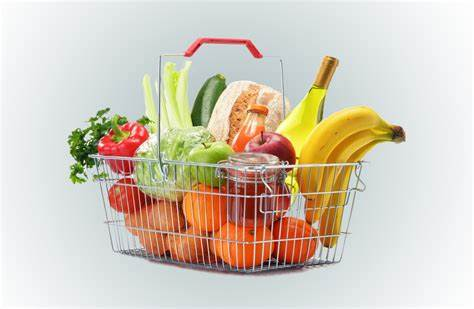


The dataset contains three columns
- Member_number - A unique number that identifies a customer
- Date - the date the transaction was done
- ItemDescrption - the specific item that was bought

##### Data Preparation

In [112]:
#Import neccessary libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
warnings.simplefilter(action='ignore', category=FutureWarning) 


In [113]:
#Load the data
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [114]:
#Check the data's information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [115]:
#Check for duplicates
df.duplicated().sum()
#Drop the duplicates
df = df.drop_duplicates()
print("Rows before removing duplicates: 38765")
print("Rows after removing duplicates: 38006")



Rows before removing duplicates: 38765
Rows after removing duplicates: 38006


In [116]:
#Check for null values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [117]:
#Convert the date column into datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
#Convert the Member number from integer to string
df["Member_number"] = df["Member_number"].astype(str)
#Extract the month, day, and year from the date column
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.strftime("%B")
df["Year"] = df["Date"].dt.year
df.head()

,Member_number,Date,itemDescription,Day,Month,Year
0,1808,2015-07-21,tropical fruit,21,July,2015
1,2552,2015-01-05,whole milk,5,January,2015
2,2300,2015-09-19,pip fruit,19,September,2015
3,1187,2015-12-12,other vegetables,12,December,2015
4,3037,2015-02-01,whole milk,1,February,2015


##### Exploratory Data Analysis
Total number of unique customers

In [118]:
#Get the number of unique customers
unique_customers = df["Member_number"].nunique()
print("The total number of unique customers is: {}". format(unique_customers))

The total number of unique customers is: 3898


Number of unique items

In [119]:
#Get the total number of unique items
no_of_items = df["itemDescription"].nunique()
print("The total number of unique items is: {}".format(no_of_items))

The total number of unique items is: 167


Top 10 most bought items

In [120]:
#Get the 10 most purchased items
top_most_purchased_items =df["itemDescription"].value_counts()
print("Top 10 most purchased items")
top_most_purchased_items.head(10)

Top 10 most purchased items


itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

Least bought items

In [121]:
#Get the items less likely to be bought
least_bought_items = df["itemDescription"].value_counts()
print("10 least purchased items")
least_bought_items.tail(10)

10 least purchased items


itemDescription
whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: count, dtype: int64

Who are the most frequent buyers and the average visit per customer

In [122]:
#Get the member number and the dates they have visited the the store to calculate the number of visits
frequent_buyers = df.groupby("Member_number")["Date"].nunique().sort_values(ascending=False)
#Calculate the average visits per customer
avg_visits=frequent_buyers.mean()
print("The average visits per customer is: {}".format(round(avg_visits)))
frequent_buyers.head(10)

The average visits per customer is: 4


Member_number
2271    11
1379    11
4338    11
3737    11
2193    11
3593    10
1052    10
2625    10
3484    10
4217    10
Name: Date, dtype: int64

What is the percentage of the least frequent buyers

In [123]:
#Get the least frequent buyers
least_frequent_buyers = df.groupby("Member_number")["Date"].nunique().sort_values(ascending=True)
#Get the number of people that have visited the store less than 4 times(average visits per customer)
least=least_frequent_buyers[least_frequent_buyers<4]
print("The total number of customers who have visited the store less than 4 times is: {}".format(len(least)))
#Get the percentage number of customers that have visited the less than 4 times
perc=len(least)/df["Member_number"].nunique() *100
print(f"That is {round(perc, 2)} of the total customers")

The total number of customers who have visited the store less than 4 times is: 1849
That is 47.43 of the total customers


Who are the buyers who purchased most items ?
What is the average items bought per buyer ? 

In [124]:
#Calculate the customers that bought the most items
items_per_customer = df["Member_number"].value_counts()
#Average item per customer
average_item_per_customer = items_per_customer.mean()
print("The average items bought per customer is: {}\n".format(round(average_item_per_customer)))
print("Customers who have purchased most items are:")
items_per_customer.head(10)

The average items bought per customer is: 10

Customers who have purchased most items are:


Member_number
3180    35
3737    33
3050    32
2051    31
3915    30
2433    30
2625    30
2851    29
2394    29
3872    29
Name: count, dtype: int64

What is the total numbe of items bought per year ?
Was there a percentage increase in the yearly sales ?


In [125]:
#Sales per year
yearly_sales = df["Year"].value_counts()
#Calculate the percentage increase in the yearly sales
year_2015 = len(df[df["Year"] == 2015])
year_2014 = len(df[df["Year"]==2014])
perc_increase = (year_2015-year_2014)/year_2014 *100
print("The percentage increase of sales between 2014 and 2015 is: {}".format(round(perc_increase,2)))
yearly_sales

The percentage increase of sales between 2014 and 2015 is: 10.85


Year
2015    19981
2014    18025
Name: count, dtype: int64

What are the monthly purchases for the 2 years

In [126]:
#Monthly purchases throughout the years
#Create a pivot table for this
monthly_sales = pd.pivot_table(data=df, index="Month", columns="Year", values="Member_number", aggfunc="count")
#The month with the highest cummulative sales
highest_monthly_sale = df["Month"].mode()[0]
print("The month with the highest cummulative sales is: {}".format(highest_monthly_sale))
monthly_sales

The month with the highest cummulative sales is: August


Year,2014,2015
Month,,
April,1533,1661
August,1556,1875
December,1453,1504
February,1409,1517
January,1499,1751
July,1557,1683
June,1551,1656
March,1384,1671
May,1595,1753


##### Basket Analysis

Calculate the support metric for each item

In [127]:
#Support is the ratio of total items bought to total transactions
#Get the number of occurence per item
item_bought = df["itemDescription"].value_counts()
#Create a list of baskets
baskets = df.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
list_of_baskets = list(baskets)
total_transactions = len(list_of_baskets)
#Calculate the support metric for individual items
support = item_bought/total_transactions
print("The support metric for each individual item is\n:")
support.head()


The support metric for each individual item is
:


itemDescription
whole milk          0.157923
other vegetables    0.122101
rolls/buns          0.110005
soda                0.097106
yogurt              0.085879
Name: count, dtype: float64

Find the association rules among the items

In [128]:
# Encoding the transactions and converting them into a data frame
te = TransactionEncoder()
transaction_df = pd.DataFrame(
    te.fit_transform(list_of_baskets),
    columns=te.fit(list_of_baskets).columns_
)
#Apply apriori to calculate the most frequent bought together items
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)
print("\n Count of frequent itemsets is: {}\n".format(len(frequent_itemsets)))
#Generate rules using the lift metric
rules = association_rules(frequent_itemsets, metric="lift")
print("\nAssociation rules for all items:")
rules.sort_values(by="zhangs_metric", ascending=False).head(10)


 Count of frequent itemsets is: 126


Association rules for all items:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,1.0,0.000536,1.004579,0.118536,0.033261,0.004558,0.089214
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,1.0,0.000536,1.016420,0.108146,0.033261,0.016154,0.089214
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,1.0,0.000565,1.007049,0.107508,0.040913,0.007000,0.081082
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,1.0,0.000565,1.010345,0.104587,0.040913,0.010239,0.081082
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,1.0,0.000088,1.000963,0.016341,0.039259,0.000962,0.079906
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,1.0,0.000088,1.001613,0.015702,0.039259,0.001611,0.079906
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,1.0,-0.000005,0.999968,-0.000795,0.036469,-0.000032,0.101549
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,1.0,-0.000575,0.988811,-0.063965,0.042784,-0.011316,0.102551
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,1.0,-0.000575,0.996140,-0.070851,0.042784,-0.003875,0.102551


In [129]:
#Display all the items that show strong association, zhang metrics above o
print("These item are likely to be bought together:\n")
rules[rules["zhangs_metric"]>0][["antecedents", "consequents"]]

These item are likely to be bought together:



,antecedents,consequents
8,(other vegetables),(frankfurter)
9,(frankfurter),(other vegetables)
30,(sausage),(soda)
31,(soda),(sausage)
34,(sausage),(yogurt)
35,(yogurt),(sausage)


##### Visualization

What is the average items per customer

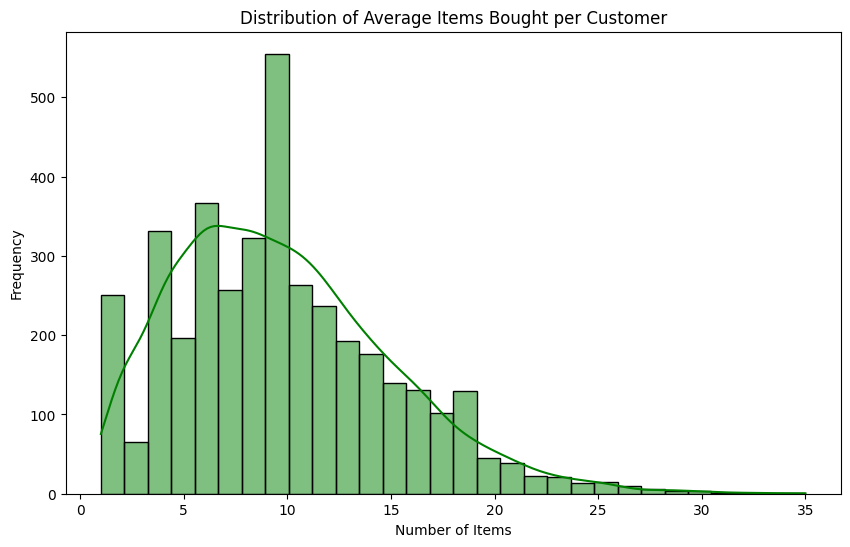

In [130]:
#Distribution of items bought per customer
plt.figure(figsize=(10,6))
sns.histplot(df["Member_number"].value_counts(), bins=30, kde=True, color="green")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.title("Distribution of Average Items Bought per Customer");

Distributions of visits per customer

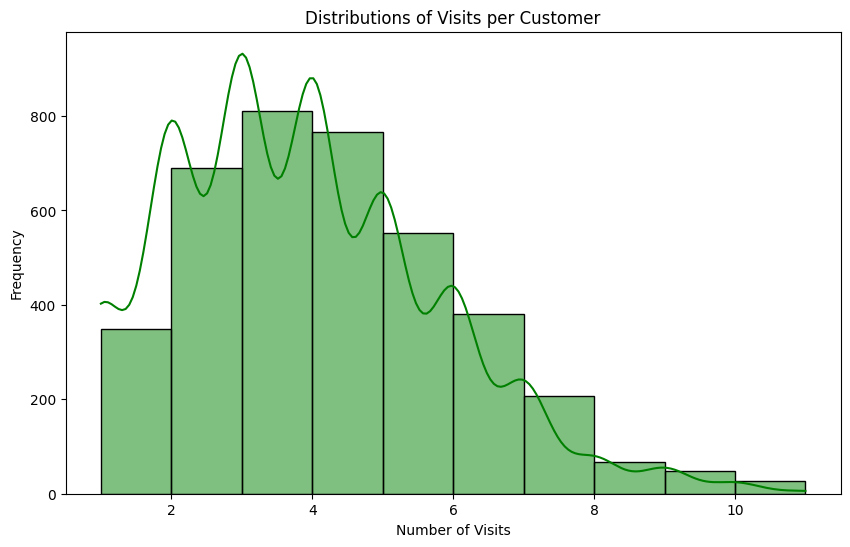

In [131]:
#Distributions of visits per customer
plt.figure(figsize=(10,6))
sns.histplot(df.groupby("Member_number")["Date"].nunique(), bins=10, kde=True, color="green")
plt.xlabel("Number of Visits")
plt.ylabel("Frequency")
plt.title("Distributions of Visits per Customer");

Top 10 customers in terms of items purchased

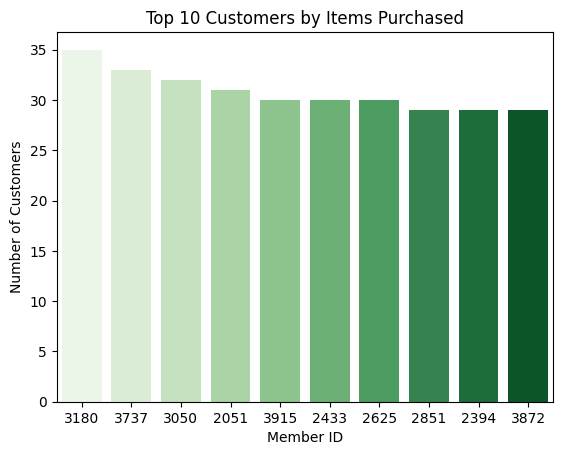

In [132]:
#Top 10 customers in terms of items purchased
top_customers = df["Member_number"].value_counts().nlargest(10).reset_index()
top_customers.columns = ["Member_number", "Count"]
#Create a custom palette
palette = sns.color_palette("Greens", n_colors=10)
#Create the barplot
sns.barplot(
    data=top_customers, x="Member_number", y="Count", palette=palette
)
plt.xlabel("Member ID")
plt.ylabel("Number of Customers")
plt.title("Top 10 Customers by Items Purchased");


Monthly sales count for every year

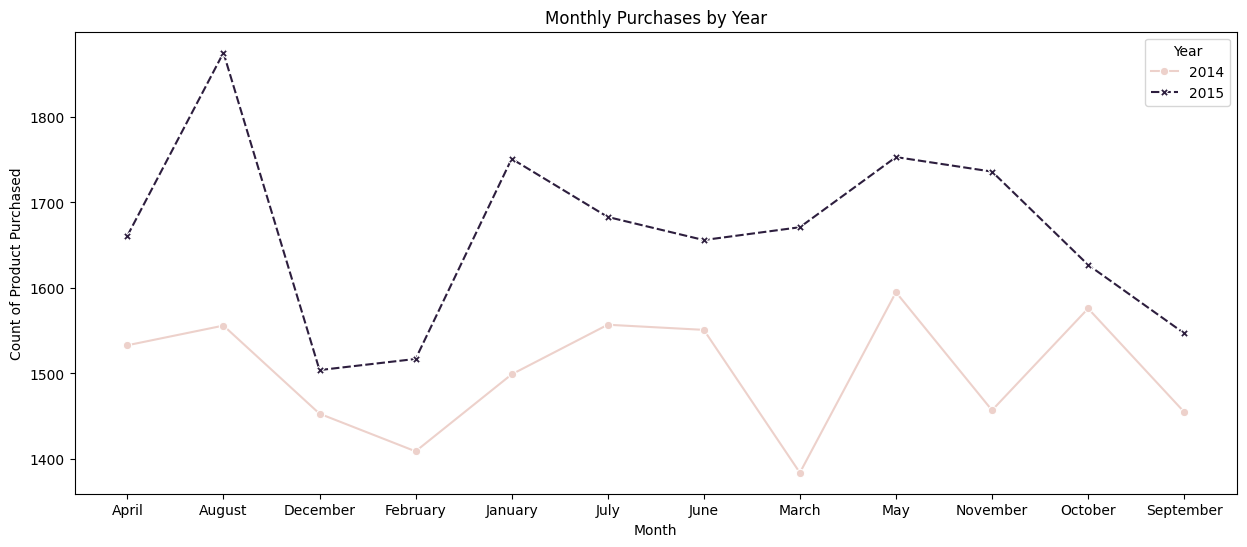

In [137]:
#Create a dataframe for monthly sales
monthly_purchases = pd.pivot_table(
    data=df, index="Month", 
    columns="Year", 
    values="Member_number", 
    aggfunc="count").reset_index().melt(
        id_vars="Month",
        var_name="Year",
        value_name="Sales Count"
    )
#Plot a line plot that shows the sales trend for different years
plt.figure(figsize=(15,6))
sns.lineplot(
    data=monthly_purchases,
    x="Month",
    y="Sales Count",
    hue="Year",
    style="Year",
    markers=True
)
plt.xlabel("Month")
plt.ylabel("Count of Product Purchased")
plt.title("Monthly Purchases by Year");

Top 10 most bought items

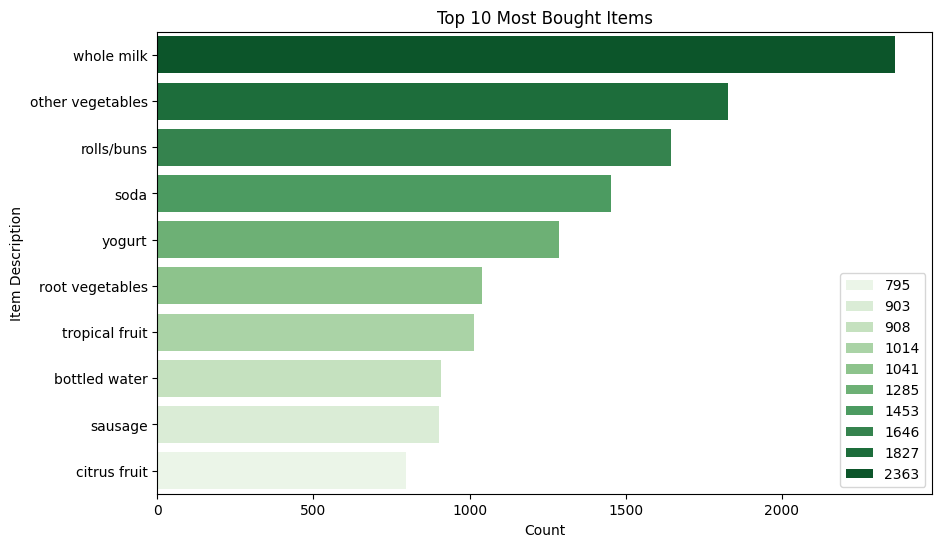

In [140]:
#Top 10 bought items
top_ten = df["itemDescription"].value_counts().head(10)
#Set a custom palette
palette= sns.color_palette("Greens", 10)
#Plot a bar chart for the 10 most bought items
plt.figure(figsize=(10, 6))
sns.barplot(y=top_ten.index, x=top_ten.values, hue=top_ten.values, palette=palette)
plt.xlabel("Count")
plt.ylabel("Item Description")
plt.title("Top 10 Most Bought Items");


10 least bought items

C:\Users\USER\AppData\Local\Temp\ipykernel_13692\829931547.py:7: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(y=bought_items.index, x=bought_items.values, hue=bought_items.values, palette=palette)


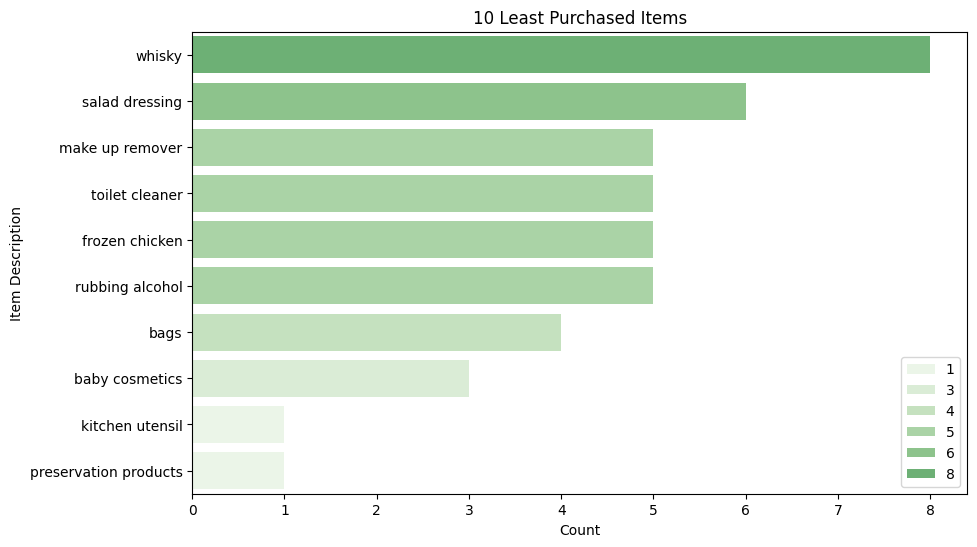

In [143]:
#10 least bought items
bought_items = df["itemDescription"].value_counts().tail(10)
#Create a custom palette
palette = sns.color_palette("Greens", 10)
#Plot a bar chart of 10 least bought items
plt.figure(figsize=(10, 6))
sns.barplot(y=bought_items.index, x=bought_items.values, hue=bought_items.values, palette=palette)
plt.xlabel("Count")
plt.ylabel("Item Description")
plt.title("10 Least Purchased Items");

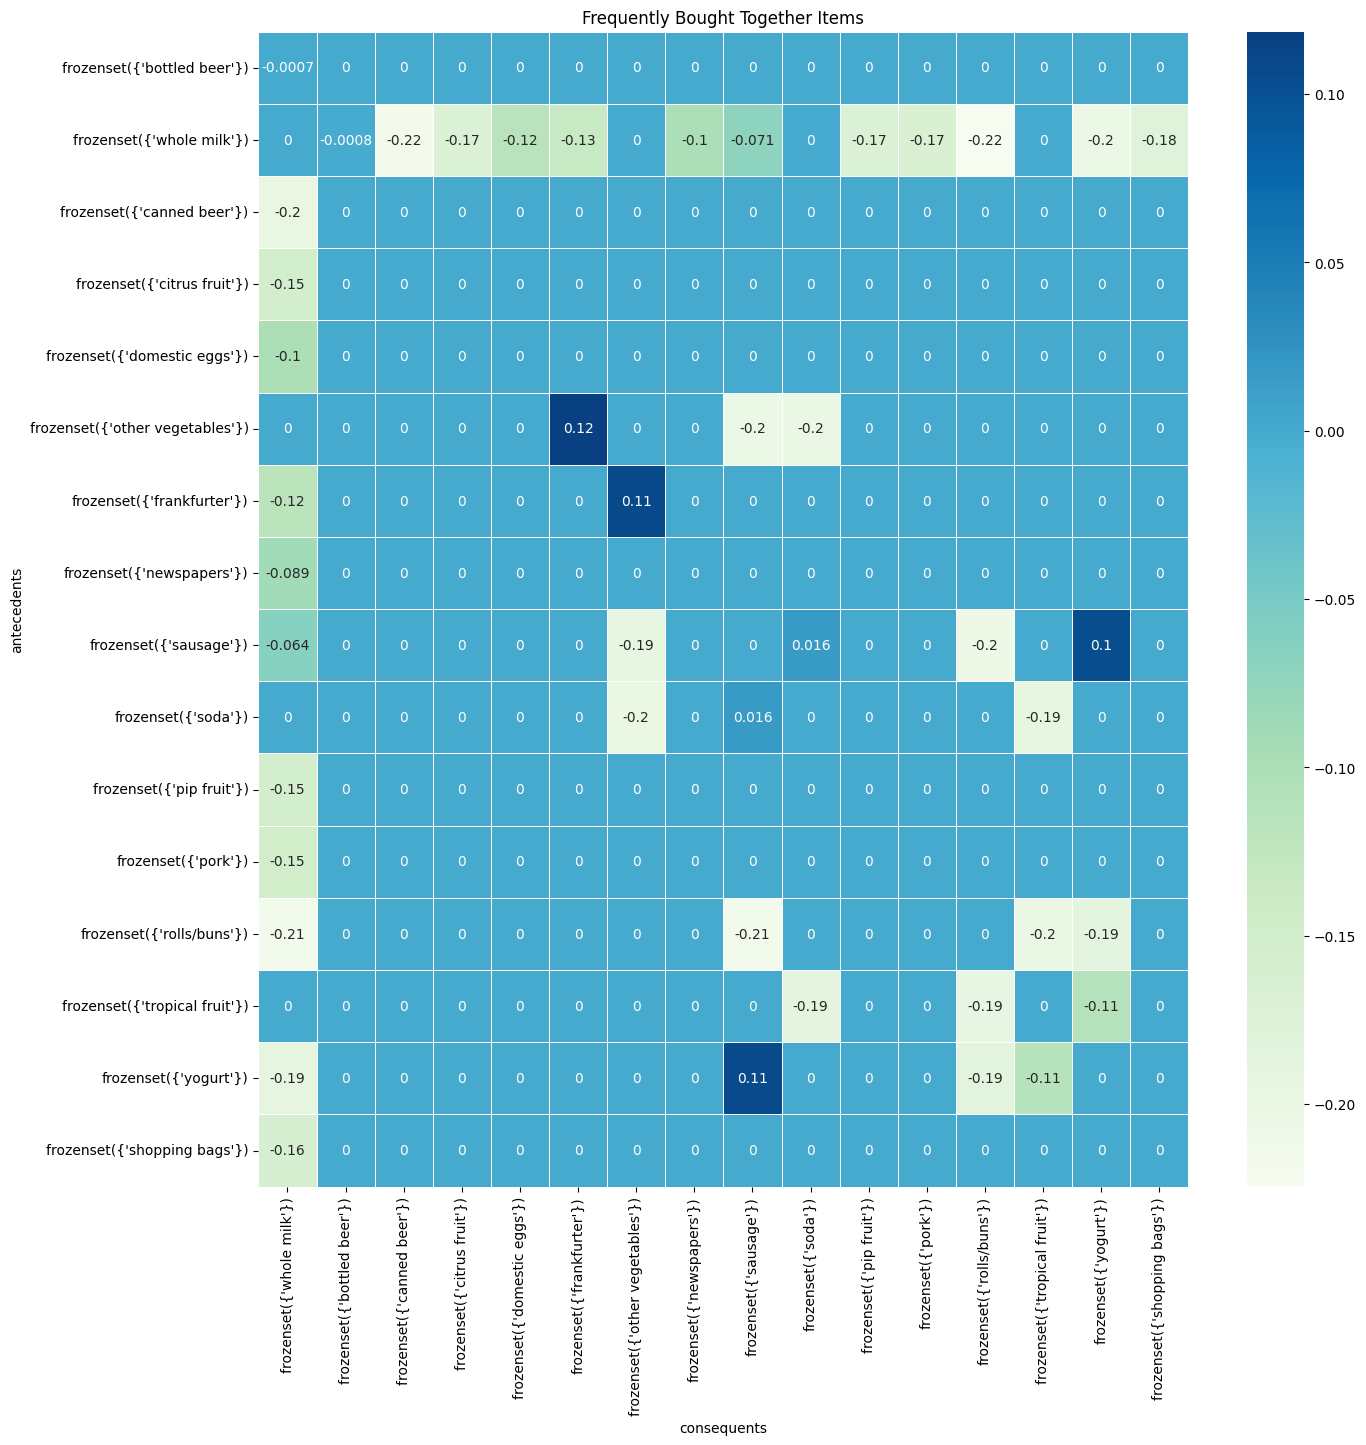

In [147]:
#Create a matrix of product association
product_association = rules.pivot(index="antecedents", columns="consequents", values="zhangs_metric").fillna(0)
#Create a heatmap of the product association
plt.figure(figsize=(15, 15))
sns.heatmap(data=product_association, annot=True, cmap="GnBu", fmt=".2g", linewidths=.5)
plt.title("Frequently Bought Together Items");

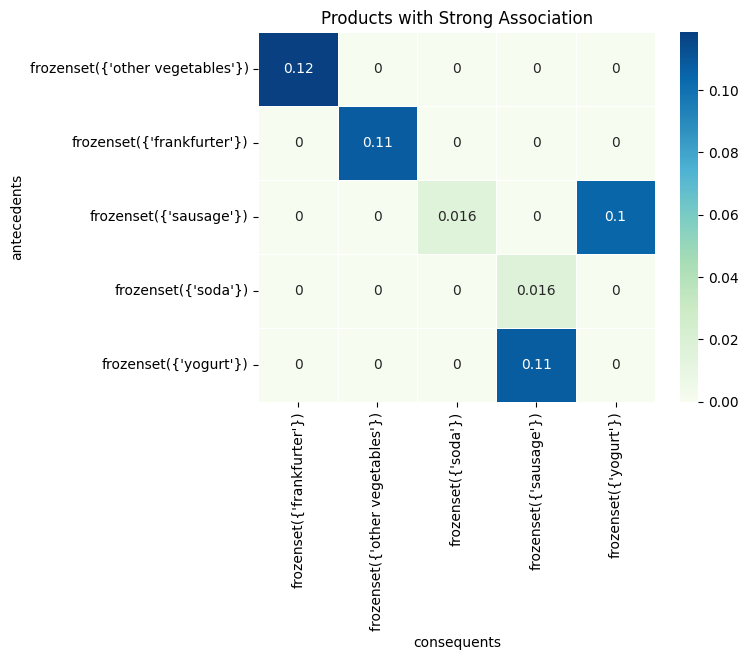

In [150]:
#Create a heatmap of products with high association
association = rules[rules["zhangs_metric"]>0]
#Create a matrix for these products that are highly associated
strong_association = association.pivot(index="antecedents", columns="consequents", values="zhangs_metric").fillna(0)
sns.heatmap(data=strong_association, annot=True, cmap="GnBu", fmt=".2g", linewidths=.5)
plt.title("Products with Strong Association");

##### Communication and Insights
**Exploratory Data Analysis**
- The total number of unique customers is 3898
- The total number of unique items bought is 167
- The average number of visits per customer is 4
- The total number of customers who have visited the store less than 4 times is 1849 which is 47.43% of the total customers
- 57.52% of the customers have visited the store more than 4 times
- The total number of sales increased by 10.85% between 2014 and 2015
- The month with the highest cummulative sales is August while December has the least

**Market Basket Analysis**
- Whole milk, other vegetable, yogurt, soda, and rolls/buns are the most frequently bought items
- Frankfurters and other vegetables are likely to  be bought together. With a lift of 0.1, it means that customers who buy frankfurters are more likely to buy other vegetables compared to those who do not buy them.
- Sausages and yogurt are frequently bought together

**Recommendations**
- Most customers buy goods in small quantities, the store could offer bulk discounts to encourage customers to buy in bulk
- A good number of customers have been to the store less than 4 times. The store should investigate the cause for this, whether it's just customer churn or just less frequent buyers.
- There is seems to be significant low sales across the months. The store could utilize seasonal trends to inform promotional campaigns.
- Place frequently bought together items adjacent to each other for easier visibility. For example, sausage and yogurt, frankfurter and other vegetables